In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats

import transform
import statistics
import fdrmethods
import simulation

#from scipy.special import comb

%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [6]:
# no zeros
labels = np.array([1,1,1,1,0,0,0,0])
data1 = np.array([[3,1,3,5,10,30,40,50],
                    [1,2,3,4,4,3,2,1]])

In [8]:
tstat1 = statistics.mannwhitney(data1,labels)
print(tstat1)



[ 0.  8.]
[ 0.   8.   5.5  6. ]


In [28]:
data2 = np.array([[0,1,3,5,10,30,40,50],
                    [1,2,3,4,4,3,2,1],
                    [100,300,200,50,30,90,23,12],
                    [0,0,0,1,0,3,0,1],
                [0,0,0,0,0,0,0,2],
                 [0,0,0,0,0,100,20,80],
                 [0,0,0,1,0,3,0,1],
                 [0,0,0,1,0,3,0,1],
                 [0,0,0,1,0,3,0,1],
                 [0,0,0,1,0,3,0,1]])

In [29]:
tstat2 = statistics.mannwhitney(data2,labels)
print(tstat2)

[ 0.   8.   1.   5.5  6.   2.   5.5  5.5  5.5  5.5]


In [25]:
labels3 = np.array([1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,])
data3 = np.array([[0,1,3,5,10,30,40,50,10,30,40,50,10,30,40,50],
                    [1,2,3,4,4,3,2,1,10,30,40,50,10,30,40,50],
                    [100,300,200,50,30,90,23,12,10,30,40,50,10,30,40,50],
                    [0,0,0,1,0,3,0,1,0,0,0,1,0,0,0,1],
                [0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1],
                 [0,0,0,0,0,100,20,80,0,0,0,1,0,0,0,0],
                 [0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1],
                 [0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1],
                 [0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1],
                 [0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1]])

In [26]:
tstat3 = statistics.mannwhitney(data3,labels3)
print(tstat3)

[ 16.    8.   16.   16.5  21.    6.5  21.   21.   21.   21. ]


<IPython.core.display.Javascript object>


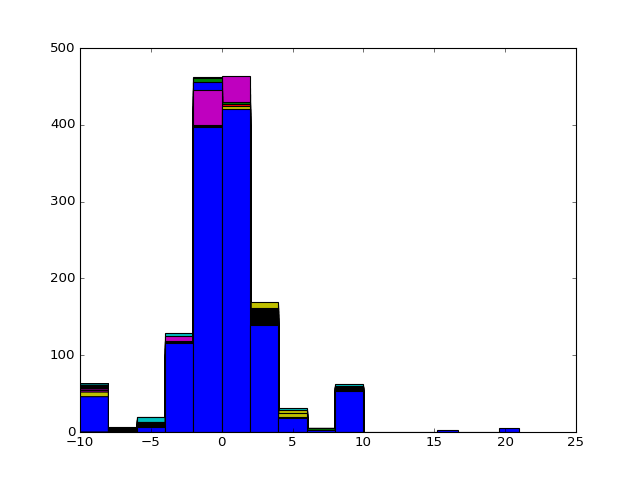

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  5.]),
 array([  6.5 ,   7.95,   9.4 ,  10.85,  12.3 ,  13.75,  15.2 ,  16.65,
         18.1 ,  19.55,  21.  ]),
 <a list of 10 Patch objects>)

In [37]:
plt.hist(tstat3)


In [38]:
plt.hist(tstat2)

(array([ 1.,  1.,  1.,  0.,  0.,  0.,  5.,  1.,  0.,  1.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <a list of 10 Patch objects>)

<IPython.core.display.Javascript object>


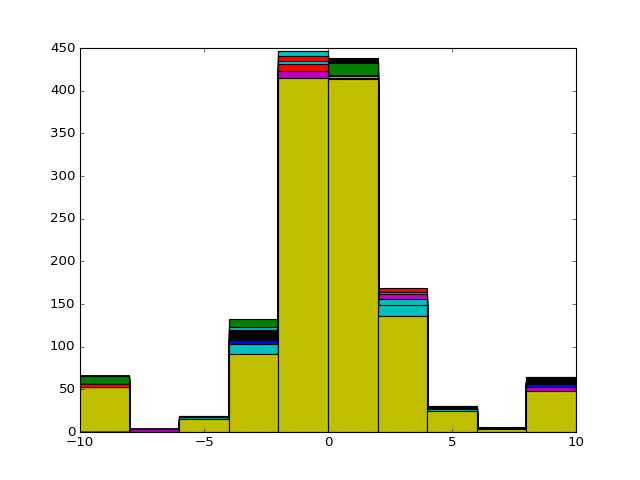

In [40]:
# check test statistics with excessive 0's
B = 100
d = [10,100,1000]

plt.figure()
for j in d:
    for i in range(B):
        data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        tstat2=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
        plt.hist(tstat2)

<IPython.core.display.Javascript object>


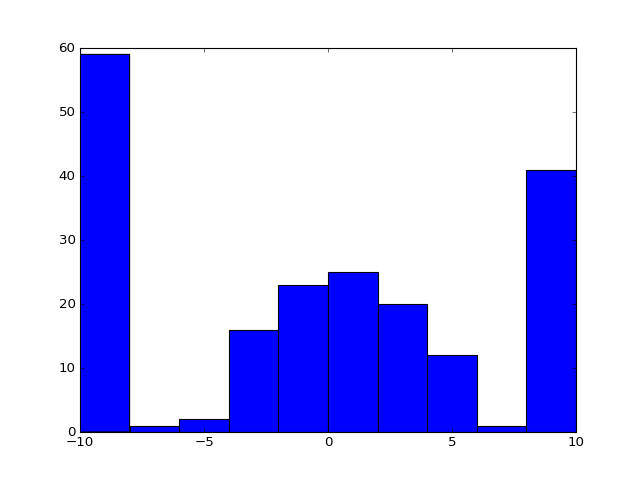

(array([ 59.,   1.,   2.,  16.,  23.,  25.,  20.,  12.,   1.,  41.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [41]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=0)
tstat0=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
plt.hist(tstat0)

<IPython.core.display.Javascript object>


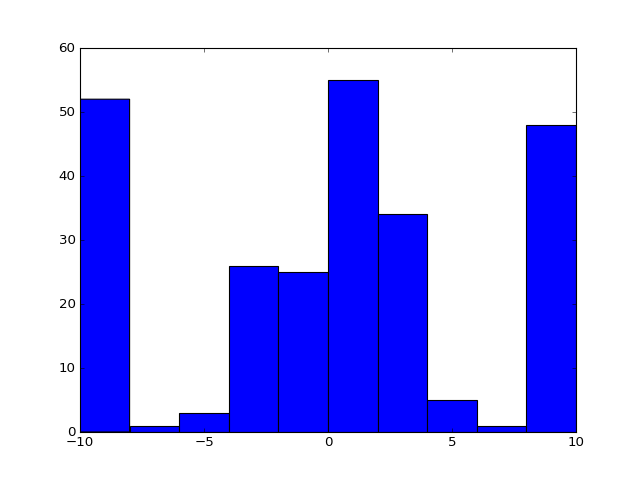

(array([ 52.,   1.,   3.,  26.,  25.,  55.,  34.,   5.,   1.,  48.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [42]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=50)
tstat50=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
plt.hist(tstat50)

<IPython.core.display.Javascript object>


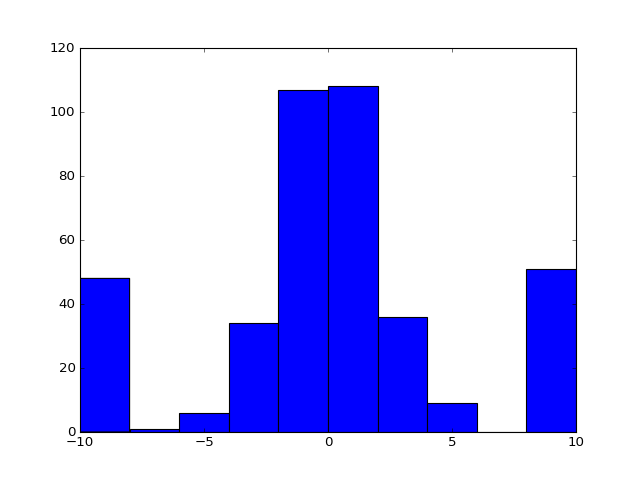

(array([  48.,    1.,    6.,   34.,  107.,  108.,   36.,    9.,    0.,   51.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [43]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=200)
tstat200=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
plt.hist(tstat200)

<IPython.core.display.Javascript object>


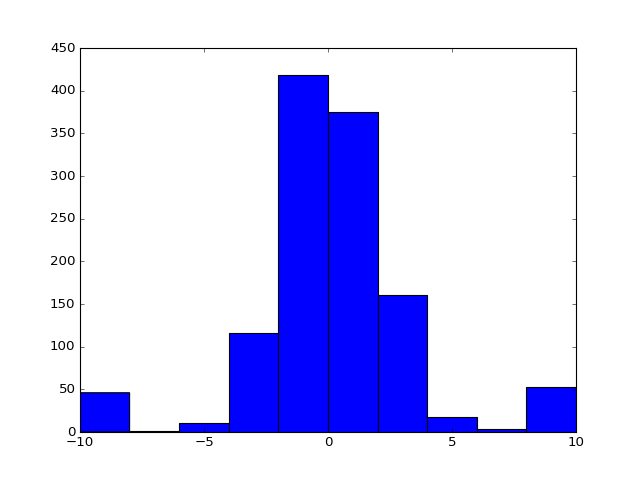

(array([  46.,    1.,   10.,  116.,  418.,  375.,  160.,   18.,    3.,   53.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [44]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=1000)
tstat1000=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[1]
plt.hist(tstat1000)

<IPython.core.display.Javascript object>


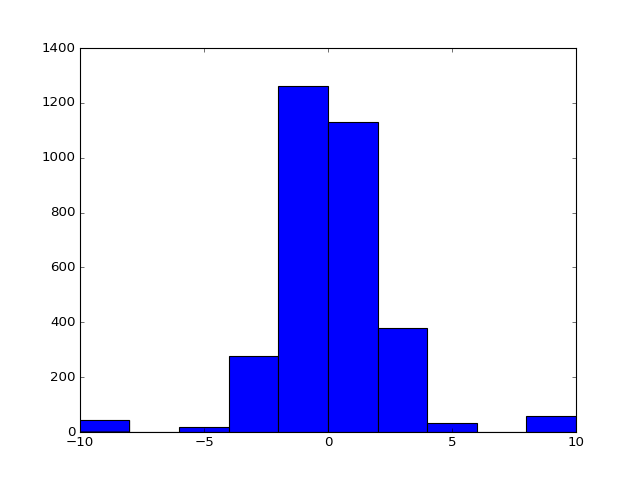

(array([   42.,     0.,    19.,   277.,  1263.,  1129.,   379.,    33.,
            0.,    58.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [45]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=3000)
tstat3000=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')
plt.hist(tstat3000[1])

<IPython.core.display.Javascript object>


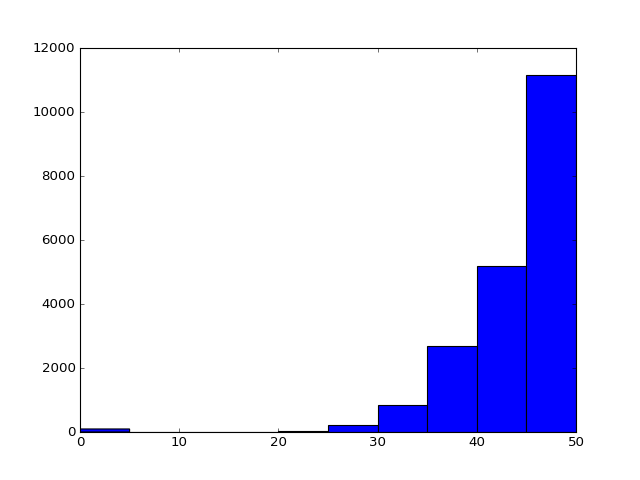

(array([  9.50000000e+01,   4.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.80000000e+01,   2.12000000e+02,
          8.46000000e+02,   2.67600000e+03,   5.18100000e+03,
          1.11660000e+04]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]),
 <a list of 10 Patch objects>)

In [53]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=20000)
tstat20000=fdrmethods.dsfdr(data,labels,transformtype = 'none', method = 'mannwhitney',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')
plt.hist(tstat20000[1])

<IPython.core.display.Javascript object>


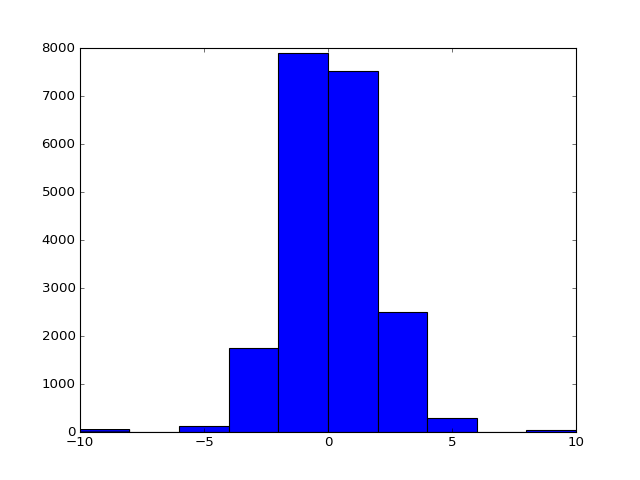

(array([  5.10000000e+01,   1.00000000e+00,   1.17000000e+02,
          1.75100000e+03,   7.90300000e+03,   7.52500000e+03,
          2.50700000e+03,   2.89000000e+02,   7.00000000e+00,
          4.90000000e+01]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

In [55]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=20000)
tstat20000_v2=fdrmethods.dsfdr(data,labels,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')
plt.hist(tstat20000_v2[1])

In [ ]:
plt.figure()
data,labels=simulation.simulatedat(numsamples = 30, numdiff=100, numc =100, numd=20000)
tstat20000_v3=fdrmethods.dsfdr(data,labels,transformtype = 'none', method = 'mannwhitney',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')
plt.hist(tstat20000_v3[1])

<IPython.core.display.Javascript object>